# Sun 397 Preprocessing

There are 397 categories, 108754 images in total.

For each category, there are at least 100 images.

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from PIL import Image
from PIL import ImageOps

In [2]:
path_dataset = 'F:/Programming/Python/SUN397/SUN397'
class_txt = 'F:/Programming/Python/SUN397/SUN397/ClassName.txt'

path_save_pad = 'F:/Programming/Python/SUN397/padded'
path_save_resize = 'F:/Programming/Python/SUN397/resized'

In [3]:
with open(class_txt) as f:
    lines = f.read().splitlines() 

for i in lines:
    file = os.listdir(path_dataset+i)
    for j in file:
        img = Image.open(path_dataset+ i + '/'+ j)
        
        # pad
        w = img.size[0]
        h = img.size[1]
        M = max(h,w)
        
        padded = ImageOps.pad(img, (M,M))
        
        if not os.path.exists(os.path.dirname(path_save_pad+ i + '/' + j)):
            try:
                os.makedirs(os.path.dirname(path_save_pad+ i + '/' + j))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise
                    
        padded.convert('RGB').save(path_save_pad+ i + '/' + j)
        
        w_check = padded.size[0]
        h_check = padded.size[1]
        
        if w_check == h_check:
            pass
        else:
            print('Not square: '+ i + '/' + j)
            break
        
        # resize
        img0 = tf.io.read_file(path_save_pad+ i + '/' + j)
        img1 = tf.io.decode_jpeg(img0, channels=3)

        img2 = tf.image.resize(img1, [32,32], method='bilinear', preserve_aspect_ratio=True)

        img3 = tf.image.convert_image_dtype(img2/255.0, dtype=tf.uint8)

        out = tf.io.encode_jpeg(img3, format='', quality=100)

        tf.io.write_file(path_save_resize + i + '/' + j, out)


D:\Python Exploration\VirEnv\progressivelearning\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  warnings.warn(
D:\Python Exploration\VirEnv\progressivelearning\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  warnings.warn(
D:\Python Exploration\VirEnv\progressivelearning\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
D:\Python Exploration\VirEnv\progressivelearning\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385478 bytes but only got 27197. Skipping tag 513
  warnings.warn(
D:\Python Exploration\VirEnv\progressivelearning\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to 

In [5]:
with open(class_txt) as f:
    lines = f.read().splitlines() 

x_all = []
y_all = []
for label,i in enumerate(lines):
    file = os.listdir(path_save_resize+i)
    for j in file:
        #print(path_save_resize+ i + '/'+ j)
        #print(label)
        img = cv2.imread(path_save_resize+ i + '/'+ j)
        x_all.append(img)
        y_all.append(label)
x_all = np.array(x_all) # (108754, 32, 32, 3)
y_all = np.array(y_all) # (108754,)

In [8]:
from numpy import save

np.save('data/sun397_x_all.npy',x_all)
np.save('data/sun397_y_all.npy',y_all)

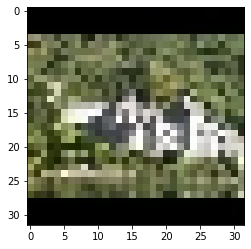

In [4]:
# show one resized image
file = os.listdir(path_save_resize+lines[0])
sample = Image.open(path_save_resize + lines[0] + '/' + file[0])
plt.imshow(sample)